In [1]:
from ase.build import bulk
from gpaw import GPAW, PW, FermiDirac
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Perform standard ground state calculation (with plane wave basis)
si = bulk('GaAs', 'zincblende', 5.6531)
calc = GPAW(mode=PW(400),
            #xc='MGGA_X_SCAN+MGGA_C_SCAN',
            xc='TB09',
            #xc='TPSS', # error niter < 1000
            #xc='revTPSS', # error niter < 1000
            kpts={'size': (6, 6, 6), 'gamma': True},
            random=True,  # random guess (needed if many empty bands required)
            occupations=FermiDirac(0.001),
            txt='GS.log')
si.calc = calc
si.get_potential_energy()
ef = calc.get_fermi_level()

In [3]:
# Restart from ground state and fix potential:
calc = si.calc.fixed_density(
    txt='BANDS.log',
    kpts={'path': 'LGX', 'npoints': 60}
    )

In [4]:
bs = calc.band_structure()
bs = bs.subtract_reference()

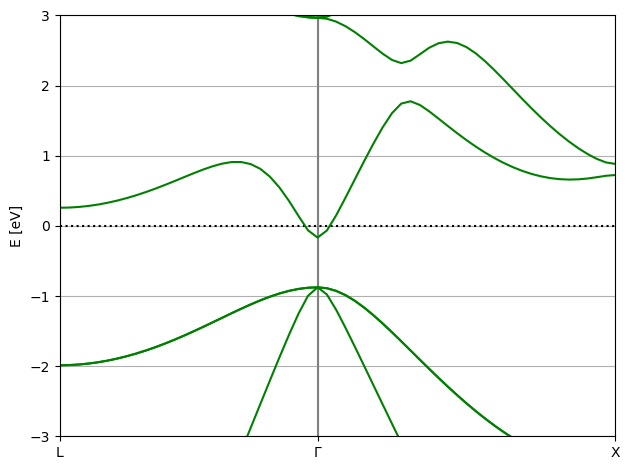

In [5]:
bs.plot(show=False, emax=6, emin=-13)
plt.ylabel('E [eV]')
plt.ylim(-3, 3)
plt.grid()
plt.tight_layout()
plt.show()